In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##6.case de kamera sabit küp anlamsız rasgele hareketler edecek şekilde bir test yaptık (belli bir radius içerisinde)

In [15]:
df = pd.read_csv('DistanceLogTest6.csv')



In [16]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,3.47,-0.0139,1.5,1.4894,-0.0002,1.5001,0.0,1.4894,0.0000,1.4894
1,3.57,-0.0296,1.5,1.4773,-0.0002,1.5001,0.0,1.4776,-0.0117,1.4894
2,3.69,-0.0482,1.5,1.4631,-0.0001,1.5001,0.0,1.4639,-0.0255,1.4894
3,3.79,-0.0643,1.5,1.4508,0.0000,1.5000,0.0,1.4522,-0.0372,1.4894
4,3.90,-0.0826,1.5,1.4367,0.0000,1.5001,0.0,1.4391,-0.0503,1.4894


In [17]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,344.000000,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,343.0000
mean,22.313488,0.039102,1.5,1.476299,0.000153,1.499766,-0.000013,1.486860,-0.002514,1.4894
std,10.931110,0.172573,0.0,0.179126,0.000122,0.000221,0.000157,0.178906,0.178905,0.0000
min,3.470000,-0.331200,1.5,1.083600,-0.000200,1.498300,-0.000400,1.102100,-0.387300,1.4894
25%,12.890000,-0.104875,1.5,1.354900,0.000100,1.499600,-0.000100,1.360925,-0.128475,1.4894
50%,22.240000,0.035400,1.5,1.504900,0.000200,1.499800,0.000000,1.505950,0.016550,1.4894
75%,31.730000,0.158850,1.5,1.617000,0.000200,1.499900,0.000100,1.629200,0.139875,1.4894
max,41.190000,0.455400,1.5,1.894300,0.000700,1.500300,0.000500,1.898300,0.408900,1.4894


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             344 non-null    float64
 1   ObjectX          344 non-null    float64
 2   ObjectY          344 non-null    float64
 3   ObjectZ          344 non-null    float64
 4   CameraX          344 non-null    float64
 5   CameraY          344 non-null    float64
 6   CameraZ          344 non-null    float64
 7   Distance         344 non-null    float64
 8   DeltaDistance    344 non-null    float64
 9   InitialDistance  343 non-null    float64
dtypes: float64(10)
memory usage: 27.0 KB


In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [21]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

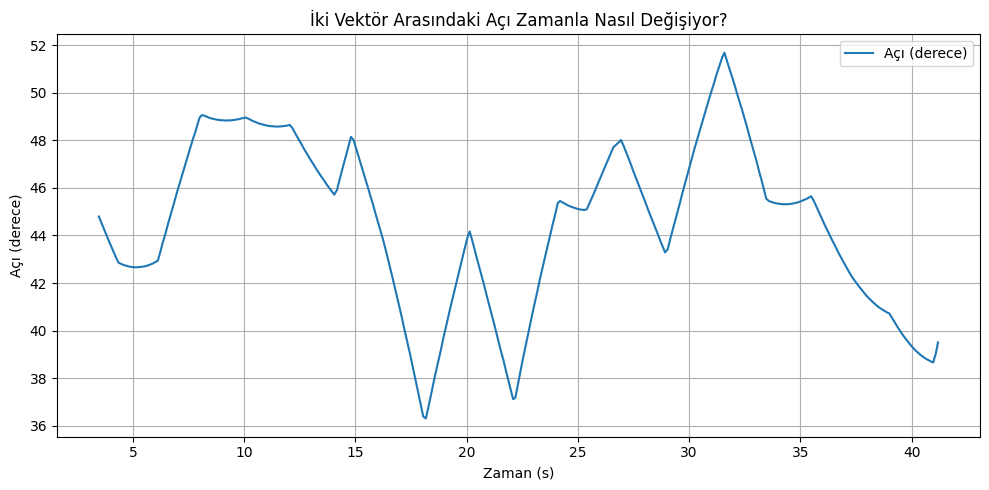

In [22]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

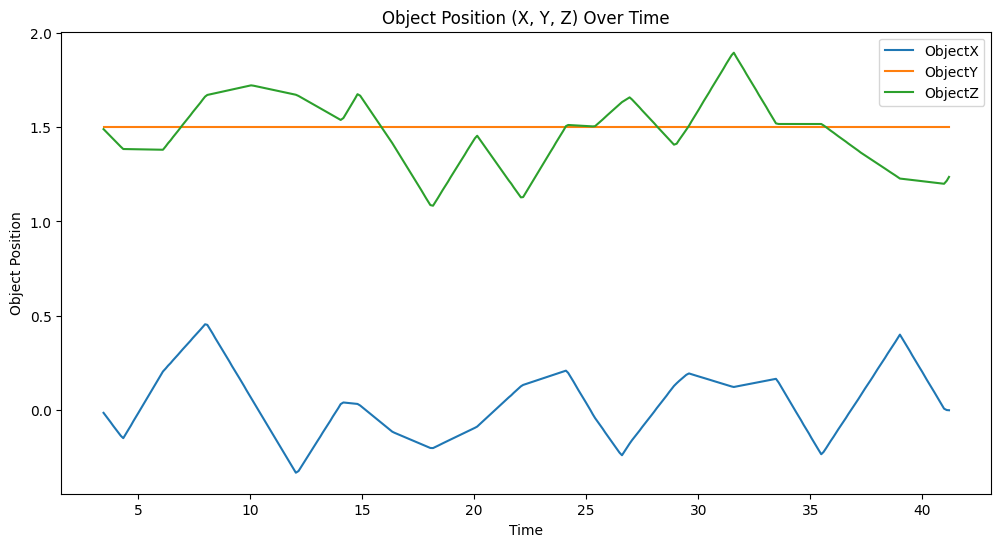

In [23]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

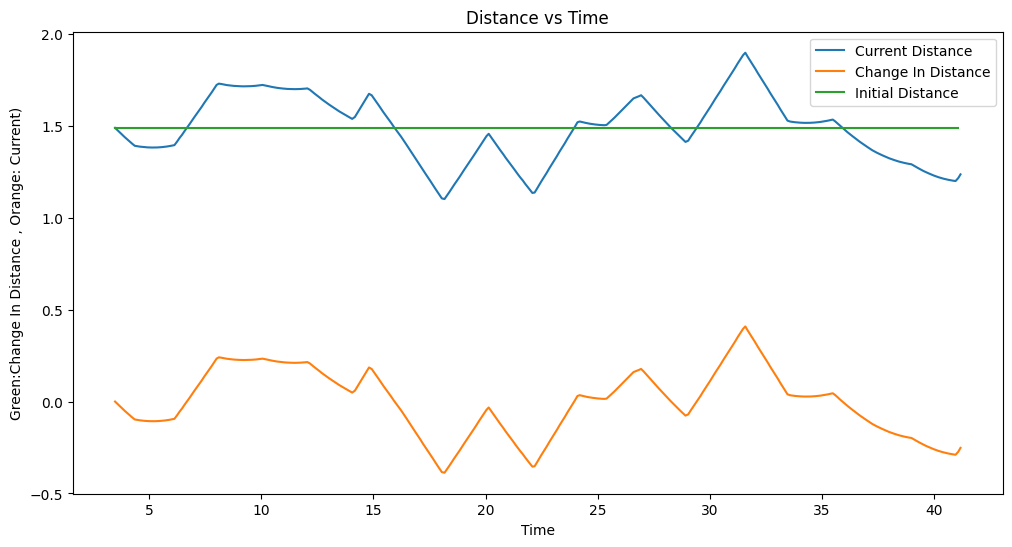

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






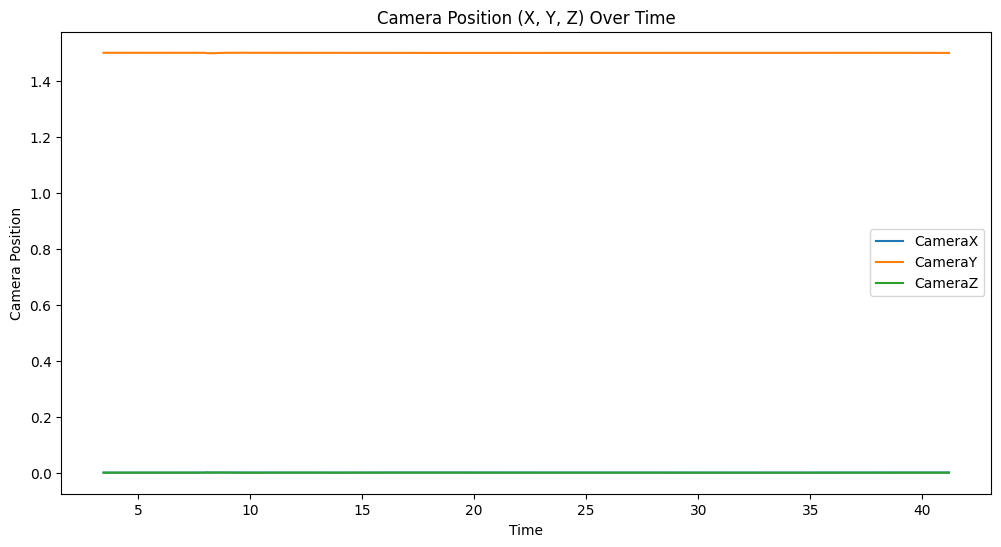

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

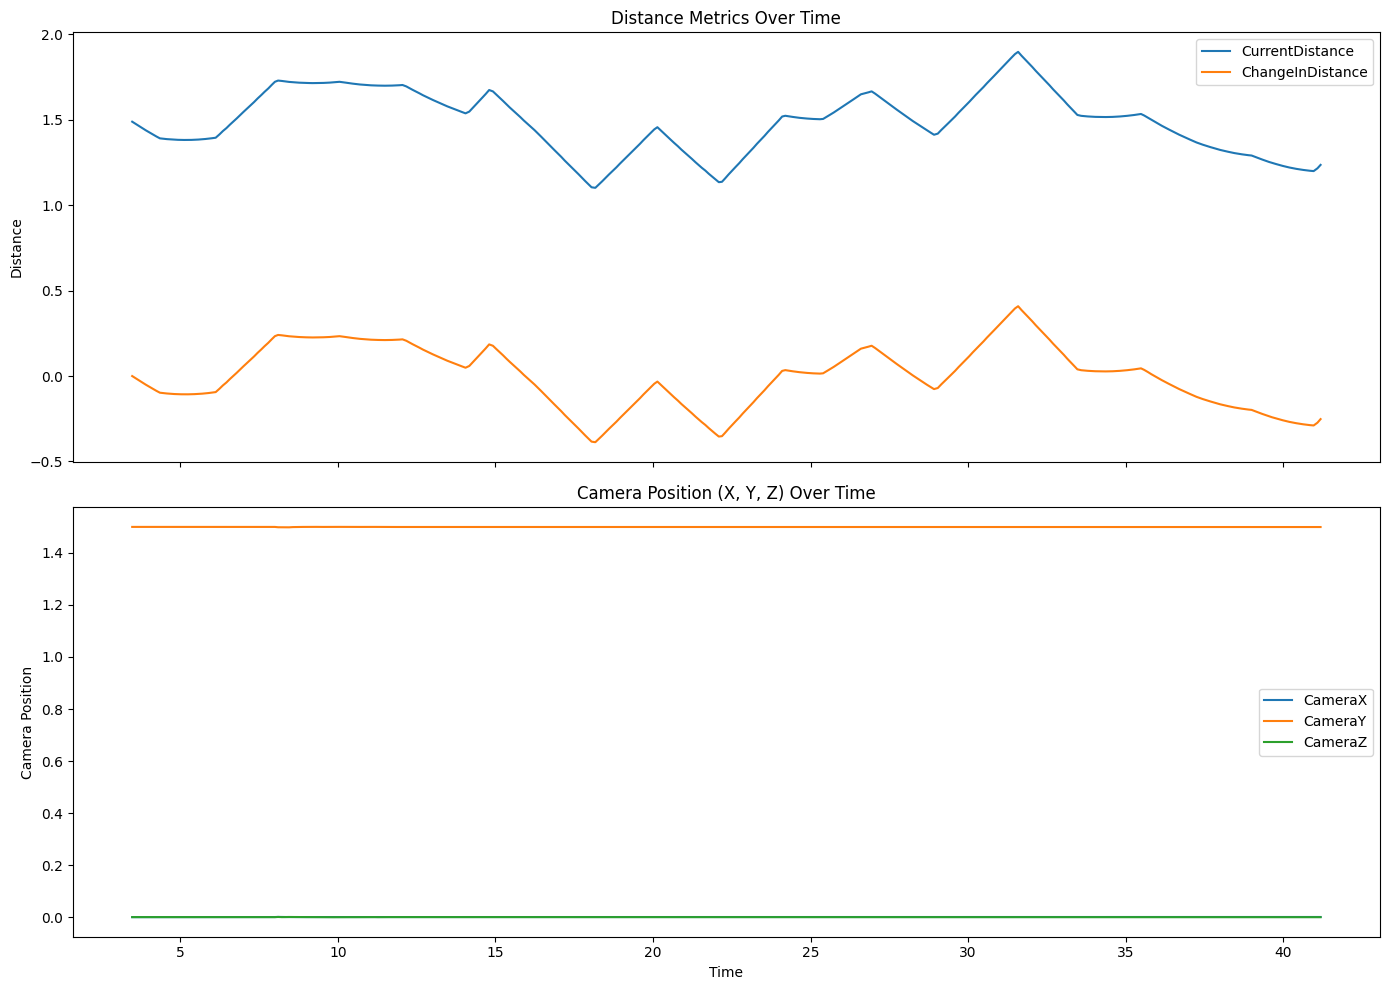

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()